In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
# Build the dataset
# non linear and long distance dataset

T = 30     #Extend for more complexity, LSTM performed better on lower length sequences
D = 1
X = []
Y = []

def get_labels(x, i1, i2, i3):
    # x is sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    elif x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    elif x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    elif x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    #y = get_labels(x, -1, -2, -3) # Short distance
    y = get_labels(x, 0, 1, 2) # Long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

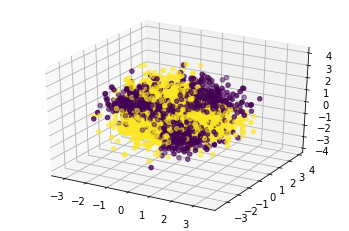

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

### Linear Model

In [5]:
# try autoregressive model
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] ,optimizer=Adam(lr=0.01))
r = model.fit(X, Y, validation_split=0.5, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7673 - accuracy: 0.5204 - val_loss: 0.7047 - val_accuracy: 0.5116
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5280 - val_loss: 0.6987 - val_accuracy: 0.5076
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5164 - val_loss: 0.7002 - val_accuracy: 0.5080
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5232 - val_loss: 0.7020 - val_accuracy: 0.5048
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5140 - val_loss: 0.6980 - val_accuracy: 0.5080
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5060 - val_loss: 0.6998 - val_accuracy: 0.4972
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5208 - val_loss: 0.6969 - val_accuracy: 0.5020
Epoch 8/100
7

79/79 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5228 - val_loss: 0.7003 - val_accuracy: 0.4956
Epoch 59/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5104 - val_loss: 0.7013 - val_accuracy: 0.4988
Epoch 60/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5176 - val_loss: 0.7004 - val_accuracy: 0.5072
Epoch 61/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5180 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 62/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5256 - val_loss: 0.6994 - val_accuracy: 0.5004
Epoch 63/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5236 - val_loss: 0.6989 - val_accuracy: 0.4972
Epoch 64/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5276 - val_loss: 0.6986 - val_accuracy: 0.5064
Epoch 65/100
79/79 

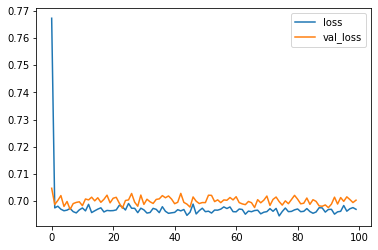

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

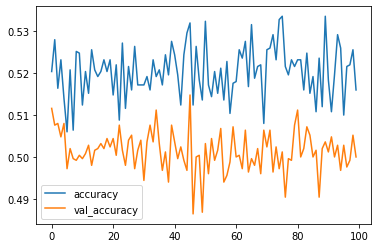

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### RNNs

In [36]:
# Reshape Input
inputs = np.expand_dims(X, -1)

# build RNN model
i = Input(shape=(T,D))
#x = LSTM(10)(i) # try SimpleRNN, LSTM, GRUs
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)           # use only with return_sequences in LSTM
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] ,optimizer=Adam(lr=0.01))

r = model.fit(inputs, Y, validation_split=0.4, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 8ms/step - loss: 0.6939 - accuracy: 0.5070 - val_loss: 0.6934 - val_accuracy: 0.4855
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5007 - val_loss: 0.6938 - val_accuracy: 0.5005
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.5130
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5127 - val_loss: 0.6937 - val_accuracy: 0.4985
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5110 - val_loss: 0.6928 - val_accuracy: 0.4945
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5223 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5207 - val_loss: 0.6915 - val_accuracy: 0.5215
Epoch 8/100
9

Epoch 59/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2275 - accuracy: 0.9190 - val_loss: 0.2554 - val_accuracy: 0.9110
Epoch 60/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.9190 - val_loss: 0.2433 - val_accuracy: 0.9110
Epoch 61/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2111 - accuracy: 0.9267 - val_loss: 0.2300 - val_accuracy: 0.9145
Epoch 62/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2050 - accuracy: 0.9330 - val_loss: 0.2235 - val_accuracy: 0.9215
Epoch 63/100
94/94 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.9353 - val_loss: 0.2366 - val_accuracy: 0.9160
Epoch 64/100
94/94 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9310 - val_loss: 0.2214 - val_accuracy: 0.9205
Epoch 65/100
94/94 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9370 - val_loss: 0.2214 - val_accuracy: 0.9160
Epoch 

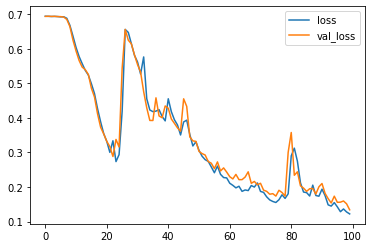

In [37]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

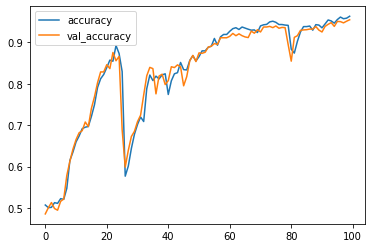

In [38]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()